# <center><div class='alert alert-success'>  GeeksforGeeks </div></center>

## <font color='green'>Scikit Learn</font>

Scikit-learn (also known as sklearn) is a popular open-source machine learning library for the Python programming language. It provides a wide range of tools for various machine learning tasks, including classification, regression, clustering, and dimensionality reduction.

Scikit-learn is built on top of other Python scientific computing libraries such as NumPy, SciPy, and matplotlib, and provides a high-level API for using these tools to build and train machine learning models.

## `Table of Contents`

<div class='alert alert-success'>

**1. Data Preprocessing and Transformation<br>
    ----- a) StandardScaler()<br>
    ----- b) MinMaxScaler()<br>
    ----- c) OneHotEncoder()<br>
    ----- d) LabelEncoder()<br>
    ----- e) Imputer()<br>
  2. Model Selection and Evaluation<br>
    ----- a) train_test_split()<br>
    $\;\;\;\;\;\;$  $\;\;\;\;\;\;$ Mean Squared Error<br>
    ----- b) KFold()<br>
     $\;\;\;\;\;\;$  $\;\;\;\;\;\;$ Cross Validation<br>
    ----- c) metrics.accuracy_score()<br>
    ----- d) metrics.mean_squared_error()<br> 
3. Regression Models()<br>
    ----- a) LinearRegression()<br>
    ----- b) Lasso()<br>
    ----- c) Ridge()<br>
    ----- d) ElasticNet()<br>
    ----- e) DecisionTreeRegressor()<br>
    ----- f) RandomForestRegressor()<br>
4. Classification Models<br>
    ----- a) LogisticRegression()<br>
    ----- b) SVC()<br>
    ----- c) KNeighborsClassifier()<br>
    ----- d) DecisionTreeClassifier()<br>
    ----- e) RandomForestClassifier()<br>
5. Clustering Models<br>
    ----- a) KMeans()<br>
    ----- b) AgglomerativeClustering()<br>
    ----- c) DBSCAN()<br>
6. Dimensionality Reduction<br>
    ----- a) PCA()<br>
    ----- b) TSNE()<br>**
    


In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

## <font color='green'>1. Data Preprocessing and Transformation</font>

### `a) StandardScaler()`

In scikit-learn, the StandardScaler is a preprocessing tool that is used to standardize the features of a dataset. Standardization is a common preprocessing step in machine learning, where the mean of each feature is centered at zero and the standard deviation is scaled to 1. This is also known as Z-score normalization.

The StandardScaler works by subtracting the mean of each feature from each observation and then dividing by the standard deviation. This ensures that each feature has a mean of zero and a standard deviation of one. This process is performed independently on each feature of the data.



The formula for Standard Scaler in markdown format is:<br>
**x_scaled = (x - u) / s**<br>
where:
- x is a feature in the dataset
- u is the mean of the feature values
- s is the standard deviation of the feature values
<br><br>
The formula rescales the feature x so that it has a mean of 0 and a standard deviation of 1.


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
data = {'A': [1, 2, 3, 4], 'B': [10, 20, 30, 40], 'C': [100, 200, 300, 400]}
df = pd.DataFrame(data)
de=df.copy()

In [5]:
# create an instance of StandardScaler class
scaler = StandardScaler()

In [6]:
# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df)

In [7]:

# convert the scaled data back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

#### Before Preprocessing

In [8]:
print(de)

   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400


#### After preprocessing

In [9]:
print(scaled_df)

          A         B         C
0 -1.341641 -1.341641 -1.341641
1 -0.447214 -0.447214 -0.447214
2  0.447214  0.447214  0.447214
3  1.341641  1.341641  1.341641


### `b) MinMaxScaler()`

MinMaxScaler is another data preprocessing technique used in machine learning to rescale the features of a dataset. Instead of standardizing the features like the Standard Scaler, MinMaxScaler scales the features to a fixed range between 0 and 1.

The formula used by MinMaxScaler to rescale a feature x is given by:

**x_scaled = (x - x_min) / (x_max - x_min)**

where:
- x_min and x_max are the minimum and maximum values of the feature x in the dataset.<br><br>
The main purpose of using MinMaxScaler is to transform the features of a dataset so that they have similar ranges. This can be useful in many machine learning algorithms that rely on distance calculations, such as k-Nearest Neighbors (k-NN) and clustering algorithms. Without scaling the features, the distance between two points can be dominated by the features with the largest values, which can skew the results.


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.DataFrame({'A': [10, 20, 30, 40], 'B': [100, 200, 300, 400]})

# create MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
df_scaled = scaler.fit_transform(df)

# convert the scaled data back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#### Before Preprocessing

In [12]:
print(df)

    A    B
0  10  100
1  20  200
2  30  300
3  40  400


#### After Preprocessing

In [13]:
print(df_scaled)

          A         B
0  0.000000  0.000000
1  0.333333  0.333333
2  0.666667  0.666667
3  1.000000  1.000000


### `c) One Hot Encoder()`

One hot encoding is a technique used to transform categorical data into a numerical format that can be used for machine learning algorithms. It involves converting each categorical value into a binary vector where only one bit is "hot" (set to 1) while the others are "cold" (set to 0).

For example, suppose we have a categorical feature called "color" with three possible values: red, blue, and green. We can represent each value as a binary vector with three bits, where only one bit is hot. We might use the following encoding scheme:

**Red: [1, 0, 0]<br>
Blue: [0, 1, 0]<br>
Green: [0, 0, 1]<br>**<br>
So if we had a data point with the "color" feature equal to "red", we would represent it with the binary vector [1, 0, 0]. Similarly, if the "color" feature was "green", we would represent it with the binary vector [0, 0, 1].

This technique is useful because many machine learning algorithms cannot handle categorical data directly. By converting categorical features to numerical features, we can use these algorithms on a wider range of datasets.

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
df = pd.DataFrame({'color': ['red', 'blue', 'green', 'red', 'blue']})
df

,color
0,red
1,blue
2,green
3,red
4,blue


In [16]:
encoder = OneHotEncoder()

In [17]:
df_encoded = encoder.fit_transform(df[['color']]).toarray()

In [18]:
df_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

#### A function to get the feature names

In [19]:
encoder.get_feature_names()

array(['x0_blue', 'x0_green', 'x0_red'], dtype=object)

In [20]:
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names())
df_encoded

,x0_blue,x0_green,x0_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


#### Let's concatenate the parent column with the encoded columns

In [21]:
df_concatenated = pd.concat([df, df_encoded], axis=1)
df_concatenated

,color,x0_blue,x0_green,x0_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


### `d) Label Encoder`

abel encoding is another technique used to transform categorical data into a numerical format that can be used for machine learning algorithms. In this method, each unique categorical value is assigned a unique integer label.

For example, suppose we have the same categorical feature "color" with three possible values: red, blue, and green. We can assign each value a unique label as follows:

- Red: 0
- Blue: 1
- Green: 2<br><br>
So if we had a data point with the "color" feature equal to "red", we would represent it with the integer value 0. Similarly, if the "color" feature was "green", we would represent it with the integer value 2.<br><br>
Label encoding can be useful in some cases, particularly if the categorical feature has a natural ordering, such as "low", "medium", and "high". However, it is important to note that assigning integer labels to categorical values can sometimes be misleading, as the numerical values do not necessarily correspond to any meaningful quantity. For example, if we were to assign integer labels to the colors of the rainbow (red, orange, yellow, green, blue, indigo, violet), the resulting labels would not correspond to any meaningful order.<br><br>
Additionally, some machine learning algorithms may interpret the numerical labels as having an order, even if none exists. In such cases, one hot encoding may be a better choice to avoid such problems.


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
data = {'fruits': ['apple', 'banana', 'orange', 'apple', 'orange']}
df = pd.DataFrame(data)
df


,fruits
0,apple
1,banana
2,orange
3,apple
4,orange


In [24]:
le = LabelEncoder()
df['fruits_encoded'] = le.fit_transform(df['fruits'])

In [25]:
df

,fruits,fruits_encoded
0,apple,0
1,banana,1
2,orange,2
3,apple,0
4,orange,2


### `e )Imputer()`

The imputer function is a data preprocessing technique used to handle missing values in a dataset. It is used to fill in missing values in a dataset with a strategy that is chosen by the user. The imputer function is implemented in popular machine learning libraries such as scikit-learn and TensorFlow.

The basic idea behind the imputer function is to replace missing values with an estimated value based on the other available data. There are different strategies that can be used for imputation, such as mean, median, mode, or a user-specified constant value.

In [26]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create a sample dataframe with missing values
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, 7, 8],
        'C': [9, 10, 11, np.nan]}
df = pd.DataFrame(data)

# Create an instance of the SimpleImputer class with a strategy of mean
imputer = SimpleImputer(strategy='mean')  #we can use mode or median as well

# Fit the imputer to the dataset
imputer.fit(df)

# Transform the dataset with the imputer
imputed_data = imputer.transform(df)

# Create a new pandas dataframe with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Print the original dataframe and the imputed dataframe
print("Original dataframe:\n", df)
print("\nImputed dataframe:\n", imputed_df)

Original dataframe:
      A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

Imputed dataframe:
           A         B     C
0  1.000000  5.000000   9.0
1  2.000000  6.666667  10.0
2  2.333333  7.000000  11.0
3  4.000000  8.000000  10.0


## <font color='green'> 2. Model Selection and Evaluation</font>

In [27]:
from sklearn.linear_model import LinearRegression

### `a) train_test_split()`

`train_test_split`
is a common technique used in machine learning to split a dataset into two parts, a training set and a testing set. The purpose of this split is to evaluate the performance of a machine learning model on new, unseen data.

In order to train a machine learning model, it is necessary to have a set of data that the model can learn from. However, if we use all the available data for training, we won't have any data left to test the model's performance on unseen data. Therefore, it is important to split the dataset into a training set and a testing set.

The training set is used to train the model, while the testing set is used to evaluate its performance. The model is trained on the training set, and then the testing set is used to test the model's ability to generalize to new, unseen data. The idea is to simulate how the model will perform when it is deployed in the real world, where it will be making predictions on data that it has never seen before.

In scikit-learn, the train_test_split function can be used to split a dataset into a training set and a testing set. The function takes as input the dataset, as well as a parameter called test_size, which determines the proportion of the dataset that will be allocated to the testing set.

In [28]:
from sklearn.model_selection import train_test_split
# Load your data into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/EshantDazz/Machine_Learning/main/Machine%20Learning%20Basics/Different%20Algorithms/multiple_linear_regression.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
#x would be the feature data
#y would be our target data

In [30]:
x=df.iloc[:,:-1]
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
y=df['Target']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [32]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training features shape: {x_train.shape}")
print(f"Testing features shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (160, 3)
Testing features shape: (40, 3)
Training target shape: (160,)
Testing target shape: (40,)


In [33]:
#Lets us see what mean squared error is
from sklearn.metrics import mean_squared_error

<div class='alert alert-success'>Mean Squared Error (MSE) is a popular metric used to evaluate the performance of a regression model. It measures the average squared difference between the predicted values and the actual values of the target variable.**

- **The formula for MSE is:**

**`MSE = 1/n * Σ (y_pred - y_true)^2`**

where:

- n is the number of samples
- y_pred is the predicted value of the target variable
- y_true is the true value of the target variable<br><br>
In simpler terms, MSE measures the average of the squared differences between the predicted and actual values of the target variable. A lower MSE indicates that the model is better at predicting the target variable, as it means that the predicted values are closer to the true values.</div>



In [34]:
lr=LinearRegression()

#Training
lr.fit(x_train,y_train)


#Predicting the outputs with our test data
pred=lr.predict(x_test)



cost=mean_squared_error(y_test,pred)
#Cost is basically the error we have got in our prediction
#mean_squared_error is a technique to find the error in our prediction
print(f"Accuracy is {round(100-cost,3)}%")



Accuracy is 96.826%


### `b) KFold()`

In [35]:
from sklearn.model_selection import KFold

In [36]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [38]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [39]:
##Let us see what cross validation score is
from sklearn.model_selection import cross_val_score

**<div class='alert alert-success'>Cross-validation is a technique used to evaluate the performance of a machine learning model on a limited amount of data. The idea behind cross-validation is to split the available data into multiple subsets (folds), and use each fold as a validation set while training the model on the remaining folds.</div>**

**<div class='alert alert-success'>Cross-validation can help to reduce the variance of the model evaluation, as it allows the model to be tested on different subsets of the data. This can be particularly useful when the amount of available data is limited, as it provides a way to make the most out of the available data.</div>**

In [40]:
#creating the object
kf=KFold(n_splits=10,shuffle=True,random_state=42)  #We are making 10 splits

In [41]:
lr=LinearRegression()

results=cross_val_score(lr,x,y,cv=kf)
print("All 10 Accuracy are = ",results)

All 10 Accuracy are =  [0.90469248 0.8946926  0.71976732 0.86420469 0.93868262 0.93194788
 0.92284837 0.8750849  0.93814699 0.74132062]


In [42]:
print("The average accuracy = ",np.mean(results))

The average accuracy =  0.8731388460886025


### `c) matrix.accuracy_score():`

The metrics.accuracy_score() function is a method in the scikit-learn library that is used to calculate the accuracy of a classification model's predictions. It takes two arguments: y_true and y_pred. y_true is an array of the true labels for a set of data points, and y_pred is an array of the predicted labels for the same set of data points. The function compares these two arrays and returns the proportion of correct predictions.

In [43]:
from sklearn import metrics

# True labels for a set of data points
y_true = [0, 1, 1, 0, 1, 0]

# Predicted labels for the same set of data points
y_pred = [0, 1, 0, 0, 0, 1]

# Calculate accuracy score
accuracy = metrics.accuracy_score(y_true, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5


This means that the model's predictions were correct for 50% of the data points.

### `d) metrics.mean_squared_error`

The metrics.mean_squared_error function is a method from the scikit-learn library that calculates the mean squared error between the true and predicted values of a regression model. Mean squared error (MSE) is a commonly used metric to evaluate the performance of a regression model.

In [44]:
from sklearn import metrics
import numpy as np

# True values for a set of data points
y_true = np.array([1.2, 2.4, 3.6, 4.8, 6.0])

# Predicted values for the same set of data points
y_pred = np.array([1.0, 2.5, 3.2, 4.6, 5.5])

# Calculate mean squared error
mse = metrics.mean_squared_error(y_true, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1


This means that the average squared difference between the true and predicted values is 0.1. Lower values of MSE indicate better performance of the regression model.

## <font color='green'>3. Regression Models</font>

### `a) Linear Regression`

Linear regression is a statistical method used to find the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fit line or curve that describes this relationship. The model assumes a linear relationship between the variables and estimates the coefficients of the independent variables to predict the dependent variable. Linear regression is used to model and predict continuous outcomes and is commonly used in fields such as economics, social sciences, and machine learning.





In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/EshantDazz/Machine_Learning/main/Machine%20Learning%20Basics/Different%20Algorithms/multiple_linear_regression.csv')

In [46]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We are using the same dataframe which we used earlier

In [47]:
from sklearn.linear_model import LinearRegression 

In [48]:
lr=LinearRegression ()

x=df.iloc[:, df.columns != "Target"]
y=df["Target"]


In [49]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [53]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [54]:
#Let us do the prediction now 

In [55]:
pred=lr.predict(xtest)

#### `Lets  see the accuracy now`

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 96.878%


### `b) Lasso()`

Lasso regression, also known as L1 regularization, is a type of linear regression that helps to prevent overfitting by adding a penalty to the sum of absolute values of the regression coefficients. This penalty term shrinks the coefficients of less important features towards zero, effectively removing them from the model and allowing only the most important features to remain.

The amount of shrinkage is controlled by a hyperparameter called alpha, which balances the tradeoff between fitting the data well and keeping the model simple. Larger values of alpha result in more aggressive shrinkage, while smaller values result in less shrinkage and a model that is closer to ordinary least squares regression.

Lasso regression is commonly used in machine learning and statistical modeling, particularly when dealing with high-dimensional datasets with many correlated features. It can help to improve the interpretability of models and reduce the risk of overfitting, but it may also lead to biased estimates if the true coefficients are not sparse.

In [58]:
from sklearn.linear_model import Lasso

In [59]:
l=Lasso()

In [60]:
l.fit(xtrain,ytrain)

Lasso()

In [61]:
pred=l.predict(xtest)

In [62]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 96.965%


### `c) Ridge()`

Ridge regression, also known as L2 regularization, is a type of linear regression that helps to prevent overfitting by adding a penalty to the sum of squared values of the regression coefficients. This penalty term shrinks the coefficients of less important features towards zero, effectively reducing the magnitude of all coefficients and improving the stability of the model.

The amount of shrinkage is controlled by a hyperparameter called alpha, which balances the tradeoff between fitting the data well and keeping the model simple. Larger values of alpha result in more aggressive shrinkage, while smaller values result in less shrinkage and a model that is closer to ordinary least squares regression.

Ridge regression is commonly used in machine learning and statistical modeling, particularly when dealing with high-dimensional datasets with many correlated features. It can help to improve the generalization performance of models and reduce the risk of overfitting, but it may also lead to biased estimates if the true coefficients are not sparse.

In [63]:
from sklearn.linear_model import Ridge

In [64]:
r=Ridge()

In [65]:
r.fit(xtrain,ytrain)

Ridge()

In [66]:
pred=r.predict(xtest)

In [67]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 96.878%


### `d)  ElasticNet()`

ElasticNet regression is a linear regression technique that combines the penalties of L1 and L2 regularization, i.e., it includes both the sum of squared regression coefficients and the sum of absolute values of the regression coefficients. The combination of these penalties allows for a flexible balance between the benefits of L1 and L2 regularization.

ElasticNet regression is used to address some of the limitations of Lasso and Ridge regression. Specifically, it can handle highly correlated features more effectively than Lasso regression and can select groups of correlated variables together instead of selecting only one of them, which is a limitation of Ridge regression.

The balance between L1 and L2 regularization is controlled by two hyperparameters: alpha, which determines the overall strength of the regularization, and the ratio of L1 to L2 regularization. By tuning these hyperparameters, ElasticNet regression can effectively handle high-dimensional datasets with many correlated features while still providing interpretable models that generalize well to new data.

In [68]:
from sklearn.linear_model import ElasticNet

In [69]:
e=ElasticNet()

In [70]:
e.fit(xtrain,ytrain)

ElasticNet()

In [71]:
pred=e.predict(xtest)

In [72]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 96.93%


### `e) DecisionTreeRegressor`

A decision tree regressor is a type of machine learning algorithm used for predictive modeling, where the goal is to build a model that can make accurate predictions for new, unseen data.

In a decision tree regressor, the input data is split recursively into smaller subsets based on the values of input features. Each split is chosen to minimize the variance of the output variable within each subset, so that the resulting model can make accurate predictions.

The final model is represented as a tree structure, where each internal node represents a decision based on a particular feature, and each leaf node represents a prediction of the output variable. When new data is presented to the model, it is routed down the tree until it reaches a leaf node, which provides the predicted value of the output variable.

Decision tree regressors can be useful in a variety of applications, such as predicting sales or housing prices based on input features like location, size, and amenities. They are relatively easy to interpret and can be visualized, making them a popular choice for exploratory data analysis.

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
regr = DecisionTreeRegressor()

In [75]:
regr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [76]:
pred=regr.predict(xtest)

In [77]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 98.081%


### `f) RandomForestRegressor`

Random forest regressor is a machine learning algorithm used for regression tasks, where the goal is to predict a continuous output variable. It is an ensemble method that combines multiple decision trees to make more accurate predictions.

The algorithm works by building a large number of decision trees, each trained on a random subset of the input data and a random subset of the input features. During training, the algorithm selects a random subset of the data points for each tree and grows the tree by recursively splitting the data into smaller subsets based on the values of the input features. The final prediction is made by averaging the predictions of all the individual trees in the forest.

Random forest regressors are useful in a variety of applications, such as predicting stock prices, house prices, or customer churn rates. They are relatively easy to use and can handle large datasets with many input features. Additionally, they can provide estimates of feature importance, which can help in understanding the underlying patterns in the data.

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regr = RandomForestRegressor()

In [80]:
regr.fit(xtrain,ytrain)

RandomForestRegressor()

In [81]:
pred=regr.predict(xtest)

In [82]:
cost=mean_squared_error(ytest,pred)
print(f"Accuracy is {round(100-cost,3)}%")

Accuracy is 99.497%


- We can see we got the highest accuracy when we used the RandomForestRegressor

## <font color='green'> Classifiocation Models</font>

In [83]:
from sklearn.metrics import accuracy_score

Accuracy score is a metric used to evaluate the performance of a classification model. It measures the proportion of correctly classified instances out of all the instances in the dataset. In other words, it tells you how often the model is making the correct prediction. The accuracy score is expressed as a percentage, with a higher score indicating better performance. However, accuracy score can be misleading if the dataset is imbalanced or if the classes have different costs or penalties for misclassification.

#### `LET US SEE THE DATASET WHICH WE WILL USE`

In [84]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [85]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
x=df.drop('class',axis=1)

In [88]:
y=df['class']

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

### `a) LogisticRegression`

Logistic regression is a statistical method used to predict the probability of a binary outcome (such as yes/no or true/false) based on one or more input variables. It involves fitting a logistic function to the input data in order to estimate the probability of the outcome being in one of two classes.

The logistic function is a type of S-shaped curve that maps any input value to a value between 0 and 1, which can be interpreted as the probability of the input belonging to a particular class. The logistic regression algorithm uses optimization techniques to find the best values of the parameters that define the logistic function and maximize the likelihood of the observed data.

Logistic regression can be used for both binary classification problems and multi-class classification problems (where there are more than two classes). It is a widely used and interpretable machine learning algorithm that can be applied to a variety of fields, including medical diagnosis, fraud detection, and marketing analysis.

In [90]:

from sklearn.linear_model import LogisticRegression

In [91]:
logr=LogisticRegression()

In [92]:
logr.fit(xtrain,ytrain)

LogisticRegression()

In [93]:
y_pred = logr.predict(xtest)

In [94]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy:', round(accuracy*100,3),' %')

Accuracy: 100.0  %


### `b) SVC()`

SVC, which stands for Support Vector Classifier, is a type of supervised learning algorithm used for classification tasks in machine learning. It works by finding a hyperplane in a high-dimensional space that separates the different classes of data points with the widest margin possible. The hyperplane is determined by maximizing the distance between the hyperplane and the closest data points of each class, which are known as support vectors. Once the hyperplane is established, SVC can predict the class of new data points by checking which side of the hyperplane they fall on. SVC can handle both linearly separable and non-linearly separable data by using different kernels, such as linear, polynomial, and radial basis function (RBF) kernels. The choice of kernel depends on the nature of the data and the problem at hand. SVC is a powerful and widely used classifier in machine learning, particularly in applications such as image classification, text classification, and bioinformatics.

In [95]:
from sklearn.svm import SVC

In [96]:
svc = SVC()

In [97]:
svc.fit(xtrain,ytrain)

SVC()

In [98]:
y_pred = svc.predict(xtest)

In [99]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy:', round(accuracy*100,3),' %')

Accuracy: 100.0  %


### `c)  KNeighborsClassifier()`

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for classification and regression tasks in machine learning. It works by finding the k closest data points in the training set to the new data point, based on a distance metric such as Euclidean distance, and then classifying the new data point based on the majority class among its k nearest neighbors. The value of k is a hyperparameter that can be chosen based on the nature of the data and the problem at hand. In the case of regression, KNN works by taking the average of the values of its k nearest neighbors to predict the target value of the new data point. KNN is a simple and effective classifier that can work well with both linearly separable and non-linearly separable data, although it can be sensitive to the choice of distance metric and the value of k.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Create the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [102]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred = knn.predict(xtest)

In [104]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy:', round(accuracy*100,3),' %')

Accuracy: 100.0  %


### `d) DecisionTree Classifier()`

Decision tree classification is a machine learning algorithm that works by recursively partitioning the input data into subsets based on the value of a specific feature. The algorithm builds a tree-like model where each node represents a feature and each branch represents a decision based on the value of that feature.

At each node, the algorithm chooses the feature that provides the most information gain, meaning the feature that most effectively splits the data into subsets that have different class distributions. The algorithm continues this process until it reaches a stopping criterion, such as reaching a certain depth or having a certain number of data points in each leaf node.

Once the decision tree is built, it can be used to classify new data points by traversing the tree from the root to a leaf node, following the path determined by the values of the features for the new data point. The class label associated with the leaf node reached by the new data point is then assigned as the predicted class label.

Decision tree classification is simple to understand and interpret, and it can handle both categorical and numerical data. However, it may suffer from overfitting, especially when the tree is deep or when the training data is noisy or imbalanced.

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
clf = DecisionTreeClassifier()

In [107]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [108]:
y_pred = clf.predict(xtest)

In [109]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy:', round(accuracy*100,3),' %')

Accuracy: 93.333  %


### `f)  RandomForest Classifier`

Random Forest Classifier is a popular machine learning algorithm that works by constructing multiple decision trees on randomly sampled subsets of the input data, and then averaging their predictions to improve accuracy and reduce overfitting.

To build a Random Forest Classifier, the algorithm selects a random subset of the training data and a random subset of the features at each node of the decision tree. It then grows multiple trees using this process, typically hundreds or thousands of trees. When a new input is presented, it is classified by each of the individual decision trees, and the class with the most votes across all the trees is selected as the final prediction.

Random Forest Classifier is a powerful algorithm that can handle both categorical and numerical data, and is resistant to overfitting. It also provides useful information about the importance of the different features in the input data.

However, Random Forest Classifier can be computationally expensive and can require tuning of several hyperparameters, such as the number of trees and the number of features to use at each node. Additionally, its predictions can be difficult to interpret compared to decision tree classifiers.

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier()

In [112]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [113]:
y_pred = rfc.predict(xtest)

In [114]:
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy:', round(accuracy*100,3),' %')

Accuracy: 100.0  %


## <font color='green'> 5. Clustering Algorithm</font>

### `a) KMeans()`

K-means is a popular clustering algorithm used to partition a dataset into K clusters of similar data points. The algorithm starts by randomly selecting K points as cluster centers, then iteratively assigns each data point to the nearest cluster center and recomputes the center of each cluster based on the newly assigned data points. This process is repeated until the cluster centers no longer move or a maximum number of iterations is reached. K-means is a relatively simple and efficient algorithm, but it can be sensitive to the initial random choice of cluster centers and may converge to a suboptimal solution.

In [115]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #For getting the datas
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### Visualizing the clusters

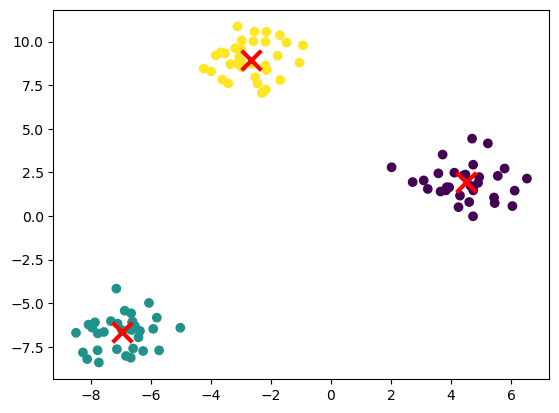

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


### `b)  AgglomerativeClustering()`

Agglomerative Clustering is a hierarchical clustering algorithm that groups similar data points together based on their distance or similarity.

The algorithm starts by treating each data point as a separate cluster, and then iteratively merges the closest pairs of clusters based on a chosen linkage criterion until all data points are in a single cluster.

The linkage criterion defines how the distance between clusters is calculated, and there are several options to choose from, such as "ward", "complete", "average", and "single" linkage.

The output of Agglomerative Clustering is a dendrogram, which is a tree-like diagram that shows the hierarchical relationships between clusters. The dendrogram can be used to determine the optimal number of clusters for a given dataset by identifying the point at which merging clusters leads to the greatest reduction in within-cluster variance.

Overall, Agglomerative Clustering is a flexible and widely used algorithm for clustering data points into groups based on their similarity.

In [118]:
from sklearn.cluster import AgglomerativeClustering

In [119]:
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=0)

In [120]:
# Create instance of Agglomerative Clustering with 3 clusters
clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data
clustering.fit(X)

AgglomerativeClustering(n_clusters=3)

In [121]:
# Print the predicted labels for the data points
print(clustering.labels_)

[2 0 2 2 1 0 1 0 0 1 1 0 2 0 0 2 1 0 2 2 0 0 0 2 1 1 1 0 1 2 0 2 1 0 0 2 0
 1 2 1 0 2 1 0 0 2 0 1 2 2]


### `c) DBSCAN`

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points based on their proximity to one another. It is particularly effective at finding clusters of arbitrary shape and identifying noise points.

The algorithm works by defining a neighborhood around each data point, and then identifying dense regions of points. Points that are not in a dense region are considered outliers or noise. The main parameters of the algorithm are the minimum number of points required to form a dense region (called min_samples) and the maximum distance between neighboring points (called eps).

The algorithm starts by randomly selecting an unvisited data point and determining its neighborhood. If the number of points in the neighborhood is greater than or equal to min_samples, a new cluster is started with that point as the seed. The algorithm then expands the cluster by adding all points in the neighborhood to the cluster, and recursively adding new points to the cluster until no more points can be added. If the neighborhood contains fewer than min_samples points, the point is labeled as noise.

The algorithm repeats this process for all unvisited points until all points have been assigned to a cluster or labeled as noise. At the end of the algorithm, each data point will be assigned to a cluster label or labeled as noise.

In summary, DBSCAN is a density-based clustering algorithm that identifies dense regions of points and groups them together into clusters, while also identifying outliers and noise points. It is an effective algorithm for finding clusters of arbitrary shape and does not require a priori knowledge of the number of clusters.





In [122]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [123]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [124]:
# Create instance of DBSCAN with eps=0.3 and min_samples=5
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model to the data
dbscan.fit(X)

# Print the predicted labels for the data points
print(dbscan.labels_)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


#### Visualizing the clusters

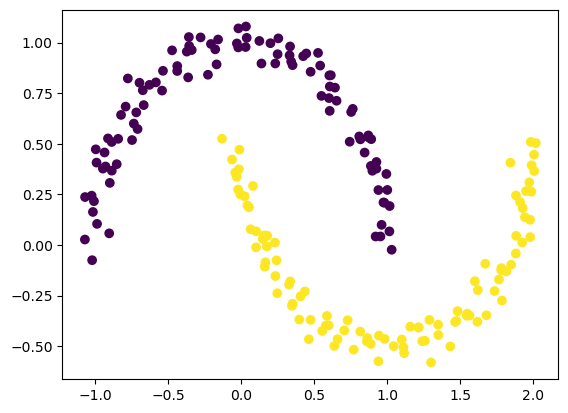

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

## <font color='green'> 6. Dimensionality Reduction </font>

Dimension reduction is the process of reducing the number of features or variables in a dataset while retaining as much information as possible. It is commonly used to reduce the complexity of data and to facilitate data visualization and analysis.

The benefits of dimension reduction include:

- Simplifying the data and making it easier to work with
- Reducing the amount of storage and memory required to store and process the data
- Reducing the computational complexity of algorithms used on the data
- Helping to avoid overfitting and improve the accuracy of machine learning models
- Making it easier to visualize and explore the data, particularly in 2D or 3D plots.


### `a) PCA()`

PCA (Principal Component Analysis) is a commonly used unsupervised machine learning technique for dimensionality reduction. It involves transforming a high-dimensional dataset into a lower-dimensional space while retaining as much information as possible.

PCA works by finding the directions of maximum variance in the data and projecting the data onto these directions. The resulting projections, called principal components, form a new set of orthogonal variables that capture the most important information in the data.

The steps involved in PCA are as follows:

1. Standardize the data: This involves scaling the data so that each feature has zero mean and unit variance.
2. Compute the covariance matrix: This matrix captures the relationships between the different features in the data.
3. Compute the eigenvectors and eigenvalues of the covariance matrix: The eigenvectors represent the directions of maximum variance in the data, while the eigenvalues represent the amount of variance explained by each eigenvector.
4. Choose the number of principal components: This involves selecting the number of eigenvectors to keep, based on how much of the total variance in the data they explain.
5. Project the data onto the principal components: This involves computing the dot product of the data with the selected eigenvectors, which yields the new set of principal components.

PCA is widely used in various applications such as image compression, face recognition, and gene expression analysis. It can also be used as a preprocessing step before applying supervised machine learning algorithms, as it can improve the performance of these algorithms by reducing the dimensionality of the data and removing irrelevant features.

In [126]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [127]:
# Load the iris dataset
iris = load_iris()

# Standardize the data
X = iris.data
y = iris.target
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [128]:
# Create a PCA object and fit the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [129]:

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.72962445 0.22850762]


#### Visualizaiton

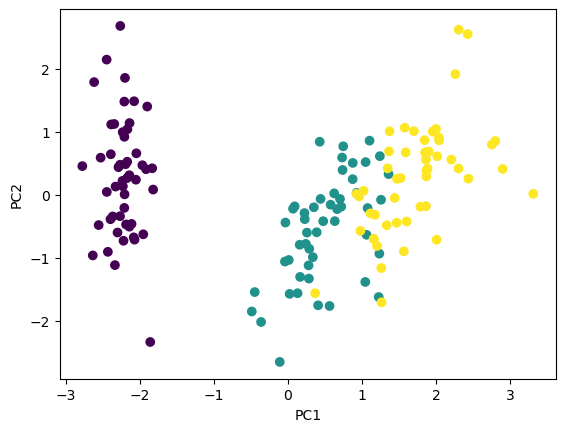

In [130]:
# Plot the data in the new 2D space
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### `b) TSNE`

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm used for dimensionality reduction, which is particularly useful for visualizing high-dimensional data in a lower-dimensional space. It works by modeling each high-dimensional data point as a probability distribution and then seeks to find a low-dimensional representation of the data that preserves the pairwise similarities between data points. The resulting visualization can help identify patterns and clusters in the data that may be difficult to discern in the original high-dimensional space.

In [131]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the iris dataset
iris = load_iris()

In [132]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [133]:
# Create a t-SNE object with two components
tsne = TSNE(n_components=2)

# Fit and transform the data using t-SNE
iris_embedded = tsne.fit_transform(iris.data)

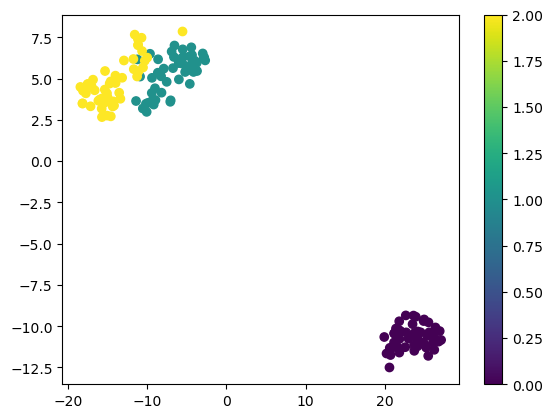

In [134]:
# Plot the t-SNE embedding
plt.scatter(iris_embedded[:,0], iris_embedded[:,1], c=iris.target)
plt.colorbar()
plt.show()